In [1]:
import sqlite3

In [2]:
conn = sqlite3.connect('sales_data.db') #creating connection with database

In [3]:
cursor_obj = conn.cursor()

In [4]:
# creating table named sales1 

sales1 = """create table IF NOT EXISTS sales1(
sale_id INT AUTO_INCREMENT PRIMARY KEY,
product_id INT,
product_name VARCHAR(20),
customer_id INT,
quantity_sold INT NOT NULL,
unit_price DECIMAL(10,2) NOT NULL,
total_revenue DECIMAL(10,2) GENERATED ALWAYS AS (quantity_sold * unit_price) STORED,
sale_date DATE NOT NULL,
region VARCHAR(20)
);"""

cursor_obj.execute(sales1)
print("Table is made")

Table is made


In [5]:
# inserting records 

cursor_obj.execute('''
insert into sales1 (product_id, product_name, customer_id, quantity_sold, unit_price, sale_date, region)
VALUES (101, 't-shirt', 202, 3, 499.99, '2025-02-01', 'Delhi'), 
(102, 'shoes', 202, 1, 999.50, '2025-02-02', 'Mumbai'),
(103, 'phone case', 203, 5, 199.99, '2025-02-04', 'Bangalore'),
(104, 'rings',  204, 3, 299.00, '2025-02-05', 'Hyderabad'),
(105, 'nail paint', 205, 4, 149.75, '2025-02-06', 'Chennai'),
(106, 'earring', 206, 6, 89.99, '2025-02-07', 'Kolkata'),
(107, 'clock', 207, 1, 1999.00, '2025-02-08', 'Pune'),
(108, 'sticker', 208, 8, 49.99, '2025-02-09', 'Ahmedabad'),
(109, 'hoodie', 209, 2, 799.00, '2025-02-10', 'Jaipur'),
(110, 'juice', 210, 10, 39.50, '2025-02-11', 'Delhi')''')

In [6]:
#updating sale_id column
query_updation = """UPDATE sales1 SET sale_id = rowid WHERE sale_id IS NULL;"""
cursor_obj.execute(query_updation)


In [7]:
query1 = """ SELECT product_id, product_name, SUM(quantity_sold) AS total_quantity, SUM(total_revenue) 
FROM sales1 
GROUP BY product_id 
ORDER BY total_revenue DESC;"""

cursor_obj.execute(query1) 
print("Total Revenue & Quantity per Product")
result1 = cursor_obj.fetchall()
for fetch in result1:
  print(fetch)

query2 = """SELECT region, COUNT(*) AS total_transactions, SUM(quantity_sold) AS total_units_sold, SUM(total_revenue) AS total_revenue_generated 
FROM sales1 GROUP BY region
ORDER BY total_revenue_generated DESC;"""

cursor_obj.execute(query2) 
print("\n Sales Distribution by Region")
result2 = cursor_obj.fetchall()
for fetch in result2:
  print(fetch)

Total Revenue & Quantity per Product
(107, 'clock', 1, 1999)
(109, 'hoodie', 2, 1598)
(101, 't-shirt', 3, 1499.97)
(103, 'phone case', 5, 999.95)
(102, 'shoes', 1, 999.5)
(104, 'rings', 3, 897)
(105, 'nail paint', 4, 599)
(106, 'earring', 6, 539.9399999999999)
(108, 'sticker', 8, 399.92)
(110, 'juice', 10, 395)

 Sales Distribution by Region
('Pune', 1, 1, 1999)
('Delhi', 2, 13, 1894.97)
('Jaipur', 1, 2, 1598)
('Bangalore', 1, 5, 999.95)
('Mumbai', 1, 1, 999.5)
('Hyderabad', 1, 3, 897)
('Chennai', 1, 4, 599)
('Kolkata', 1, 6, 539.9399999999999)
('Ahmedabad', 1, 8, 399.92)


In [8]:
import pandas as pd 

In [9]:
df = pd.read_sql_query("select * from sales1;", conn)    #reading the table in pandas
df

,sale_id,product_id,product_name,customer_id,quantity_sold,unit_price,total_revenue,sale_date,region
0,1,101,t-shirt,202,3,499.99,1499.97,2025-02-01,Delhi
1,2,102,shoes,202,1,999.50,999.50,2025-02-02,Mumbai
2,3,103,phone case,203,5,199.99,999.95,2025-02-04,Bangalore
3,4,104,rings,204,3,299.00,897.00,2025-02-05,Hyderabad
4,5,105,nail paint,205,4,149.75,599.00,2025-02-06,Chennai
5,6,106,earring,206,6,89.99,539.94,2025-02-07,Kolkata
6,7,107,clock,207,1,1999.00,1999.00,2025-02-08,Pune
7,8,108,sticker,208,8,49.99,399.92,2025-02-09,Ahmedabad
8,9,109,hoodie,209,2,799.00,1598.00,2025-02-10,Jaipur
9,10,110,juice,210,10,39.50,395.00,2025-02-11,Delhi


In [10]:
import matplotlib.pyplot as plt

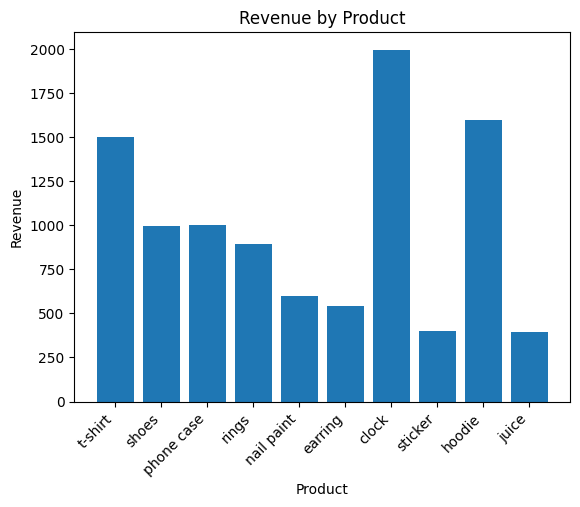

In [13]:
#plotting a bar graph

plt.bar(df['product_name'], df['total_revenue'])
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('Revenue by Product')
plt.xticks(rotation=45, ha='right')
plt.savefig("sales_chart.png")
plt.show()

In [15]:
conn.close() #closing connection as it's very important to avoid unecessary resource using 